In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
bank_data = pd.read_excel(r"C:\Users\lenovo\Downloads\rachit_blog test\rachit_blog test\bank_data.xlsx")
bank_data.head()

,Debt,Overdue Days,Initial Limit,Birth Date,Sex,Education,Income,Loan Term,Credit History Rating,Living Area,Settlement Name,Industry Name,Probability of Default,Client ID,Scoring Mark,Underage Children Count,Velcom Scoring,Family Status
0,6063.50,3,7000.0,1983-07-08,Male,Secondary special,703.07,60,A1,Gomel region,KOSAKOVKA,Agroindustrial complex,0.98,919517,233.0,0,NaN,1
1,3765.04,0,5000.0,1987-12-19,Female,Higher,1693.68,60,B2,NaN,MINSK,Finance and insurance,0.17,539353,NaN,1,NaN,1
2,2067.66,0,2650.0,1966-02-28,Female,Secondary,724.49,60,C2,GRODNO,EATERS,Medicine and healthcare,0.40,818913,NaN,0,NaN,2
3,2370.39,0,3000.0,1972-02-18,Female,Secondary special,1045.84,60,A3,MINSK,FANIPOL,Public Administration,0.29,691598,216.0,0,NaN,2
4,2280.55,0,3000.0,1997-02-23,Female,Higher,1092.65,60,B3,NaN,MINSK,Medicine and healthcare,0.63,425193,NaN,0,NaN,2


| Column                  | Description                                              |
|-------------------------|----------------------------------------------------------|
| Debt                    | Current credit debt amount                               |
| Overdue Days            | Days past due                                            |
| Initial Limit           | Initial credit limit                                     |
| Birth Date	          | Client’s birth date                                      |
| Sex                     | Gender (Male/Female)                                     |
| Education               | Education level                                          |
| Income                  | Client’s income                                          |
| Loan Term               | Credit term (in months)                                  |
| Credit History Ratingи  | Credit history rating (categorical)                      |
| Living Area             | Region of residence                                      |
| Settlement Name         | Settlement name                                          |
| Industry Name           | Employment industry                                      |
| Probability of Default  | Debt burden ratio                                        |
| Client ID               | Client ID (unique identifier)                            |
| Scoring Mark            | Credit scoring mark                                      |
| Underage Children Count | Number of underage children                              |
| Velcom Scoring          | Scoring value from another model                         |
| Family Status           | Marital status                                           |

In [3]:
bank_data.shape

(18420, 18)

In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18420 entries, 0 to 18419
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Debt                     18420 non-null  float64       
 1   Overdue Days             18420 non-null  int64         
 2   Initial Limit            18420 non-null  float64       
 3   Birth Date               18420 non-null  datetime64[ns]
 4   Sex                      18420 non-null  object        
 5   Education                18420 non-null  object        
 6   Income                   18420 non-null  float64       
 7   Loan Term                18420 non-null  int64         
 8   Credit History Rating    17488 non-null  object        
 9   Living Area              16297 non-null  object        
 10  Settlement Name          18374 non-null  object        
 11  Industry Name            18420 non-null  object        
 12  Probability of Default   18420 n

In [5]:
bank_data.describe()

,Debt,Overdue Days,Initial Limit,Birth Date,Income,Loan Term,Probability of Default,Client ID,Scoring Mark,Underage Children Count,Velcom Scoring,Family Status
count,18420.000000,18420.000000,18420.000000,18420,18420.000000,18420.000000,18420.000000,1.842000e+04,16786.000000,18420.000000,8889.000000,18420.000000
mean,4318.769750,9.196743,5127.834256,1987-11-11 08:20:19.543973952,1664.840782,52.301737,0.290288,8.226245e+05,186.432622,0.636754,177.040162,1.498751
min,0.000000,0.000000,180.000000,1956-03-10 00:00:00,0.000000,23.000000,0.000000,1.289800e+04,-108.000000,0.000000,-2.000000,1.000000
25%,1287.900000,0.000000,1550.000000,1981-01-31 00:00:00,1021.692500,36.000000,0.190000,7.193478e+05,134.000000,0.000000,-2.000000,1.000000
50%,2675.670000,0.000000,3200.000000,1988-12-17 12:00:00,1460.175000,60.000000,0.300000,9.083645e+05,182.000000,0.000000,-2.000000,1.000000
75%,5785.870000,0.000000,6912.500000,1995-11-16 00:00:00,1980.460000,60.000000,0.390000,9.621360e+05,234.000000,1.000000,278.000000,2.000000
max,40000.000000,491.000000,40000.000000,2005-04-28 00:00:00,29942.820000,60.000000,1.210000,1.061453e+06,416.000000,3.000000,998.000000,4.000000
std,4336.432353,42.309092,4879.201691,NaN,1048.813447,13.378788,0.144359,1.966853e+05,67.430848,0.854167,310.624940,0.500988


In [6]:
# as per the analysis, 'Probability of Default' can not be greater than 1, capping the outliers to 1 
bank_data[bank_data['Probability of Default']>1] #only 1 occurance of errored data

,Debt,Overdue Days,Initial Limit,Birth Date,Sex,Education,Income,Loan Term,Credit History Rating,Living Area,Settlement Name,Industry Name,Probability of Default,Client ID,Scoring Mark,Underage Children Count,Velcom Scoring,Family Status
3450,8972.41,0,11000.0,1977-02-23,Female,Higher,1792.37,60,A2,NaN,MINSK,Finance and insurance,1.21,465121,204.0,0,NaN,2


In [7]:
bank_data['Probability of Default'][bank_data['Probability of Default']>1]=1

In [8]:
(bank_data.isnull().sum()/bank_data.shape[0])*100

Debt                        0.000000
Overdue Days                0.000000
Initial Limit               0.000000
Birth Date                  0.000000
Sex                         0.000000
Education                   0.000000
Income                      0.000000
Loan Term                   0.000000
Credit History Rating       5.059718
Living Area                11.525516
Settlement Name             0.249729
Industry Name               0.000000
Probability of Default      0.000000
Client ID                   0.000000
Scoring Mark                8.870793
Underage Children Count     0.000000
Velcom Scoring             51.742671
Family Status               0.000000
dtype: float64

## Key observations:

1. Most columns are complete, but a few have missing values.

2. Variables Velcom Scoring are blank for over 50%, which cannot be imputed, thus removing the column

In [9]:
bank_data.drop(columns=['Velcom Scoring'],inplace=True)

In [10]:
# dropping rows with all rows having the same values
bank_data.drop_duplicates(inplace=True)
bank_data.shape

(18418, 17)

1. comparing both initial and final data shape, the data had 2 duplicate rows which are removed

In [11]:
# Identifying categorical data
bank_data.nunique()

Debt                        9071
Overdue Days                  24
Initial Limit                459
Birth Date                  9131
Sex                            2
Education                      5
Income                     15376
Loan Term                      6
Credit History Rating         16
Living Area                   27
Settlement Name             1938
Industry Name                 16
Probability of Default       101
Client ID                  14831
Scoring Mark                 386
Underage Children Count        4
Family Status                  4
dtype: int64

### columns containing categorical data
1. Family Status
2. Underage Children Count
3. Industry Name
4. Credit History Rating
5. Loan Term
6. Education
7. Sex 

### Numerical columns
1. Debt
2. Initial Limit
3. Income
4. Probability of Default
5. Scoring Mark

### Feature Enggineering 
1. Extracting the age of the customers as of today

In [12]:
from datetime import datetime
bank_data['Birth Date'] = pd.to_datetime(bank_data['Birth Date'])

today = pd.to_datetime('today')
bank_data['Age'] = bank_data['Birth Date'].apply(lambda dob: today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day)))
bank_data.head(3)

,Debt,Overdue Days,Initial Limit,Birth Date,Sex,Education,Income,Loan Term,Credit History Rating,Living Area,Settlement Name,Industry Name,Probability of Default,Client ID,Scoring Mark,Underage Children Count,Family Status,Age
0,6063.50,3,7000.0,1983-07-08,Male,Secondary special,703.07,60,A1,Gomel region,KOSAKOVKA,Agroindustrial complex,0.98,919517,233.0,0,1,41
1,3765.04,0,5000.0,1987-12-19,Female,Higher,1693.68,60,B2,NaN,MINSK,Finance and insurance,0.17,539353,NaN,1,1,37
2,2067.66,0,2650.0,1966-02-28,Female,Secondary,724.49,60,C2,GRODNO,EATERS,Medicine and healthcare,0.40,818913,NaN,0,2,59


<center><H1>Univariate Analysis</H1></center>

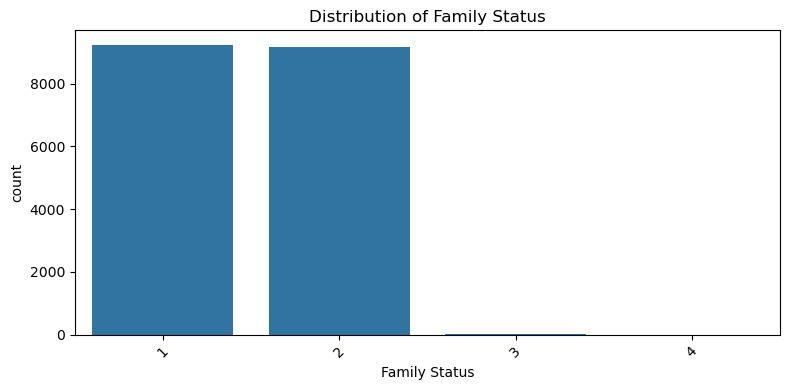

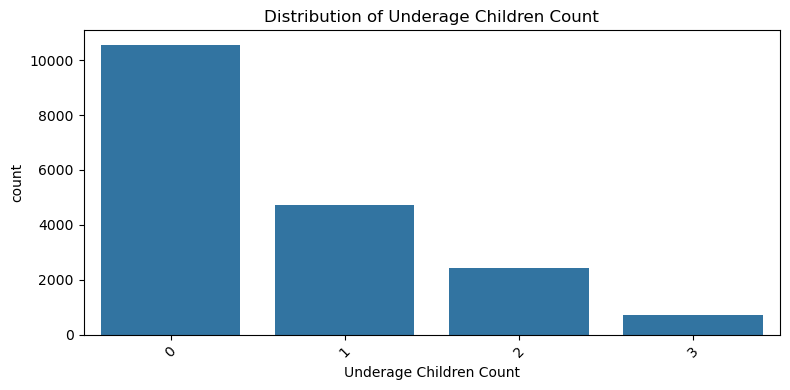

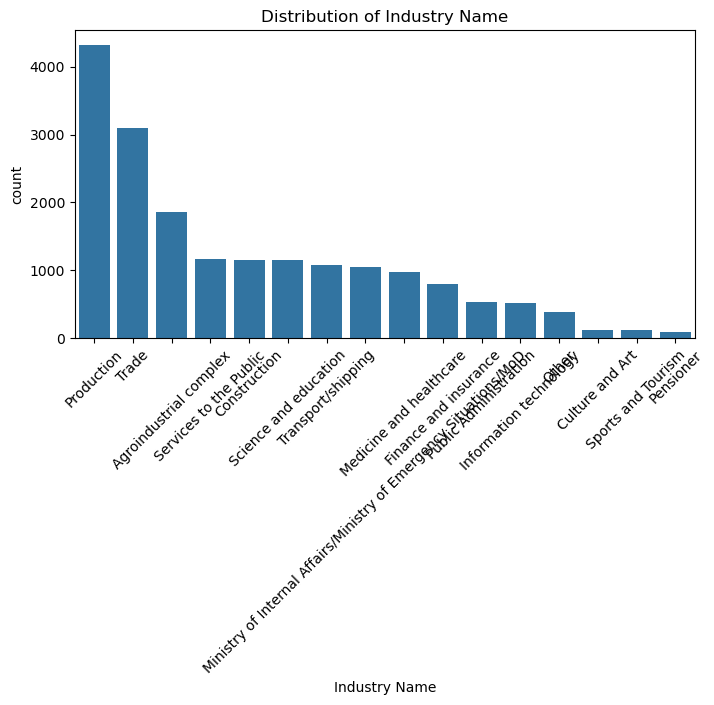

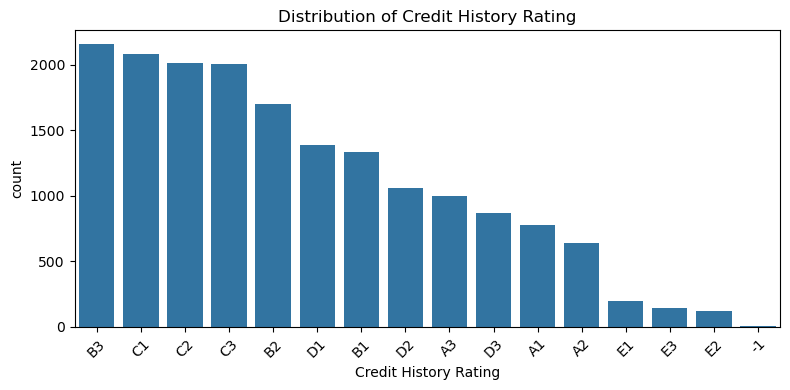

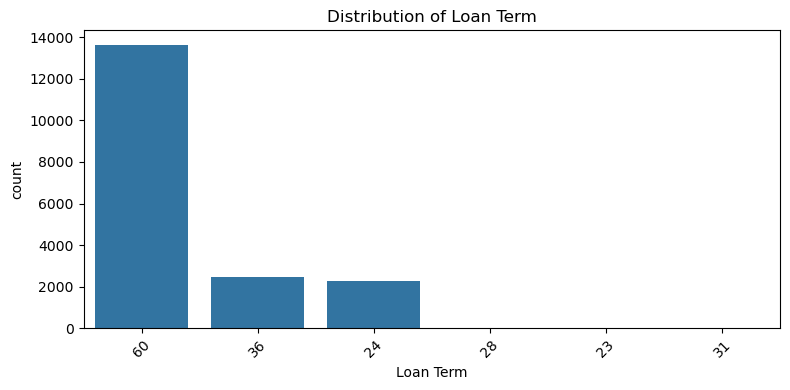

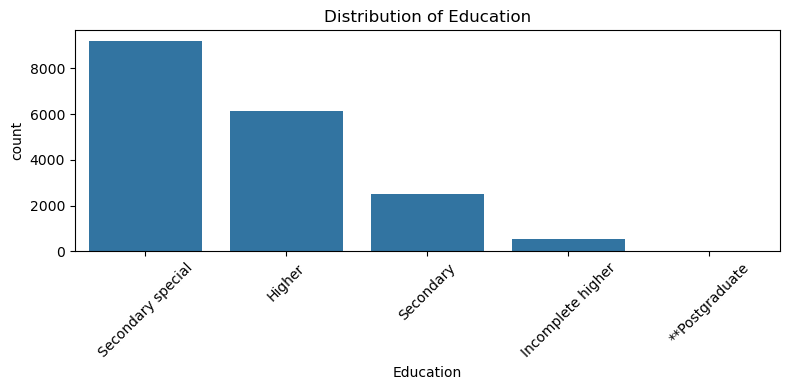

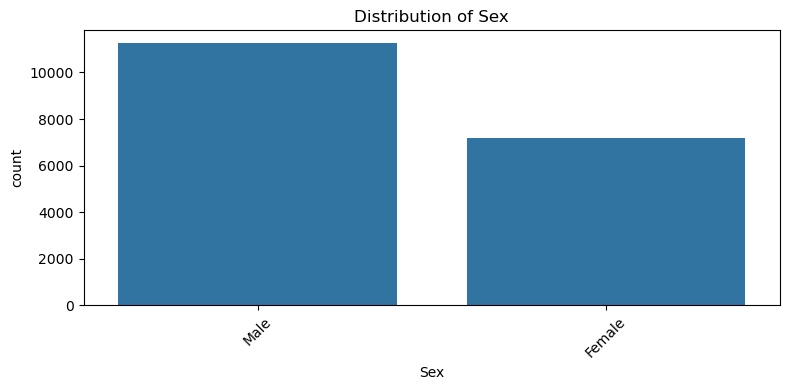

In [13]:
categorical_cols = [
    'Family Status', 'Underage Children Count', 'Industry Name',
    'Credit History Rating', 'Loan Term', 'Education', 'Sex'
]

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=bank_data, order=bank_data[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


## conclusion
1. Almost all customers are 1--> Single, 2-->Married
2. Over 10000 families have 0 underage children
3. The majority of customers either work in the production industry or Trade
4. Major loan terms are provided for 5 years tenure

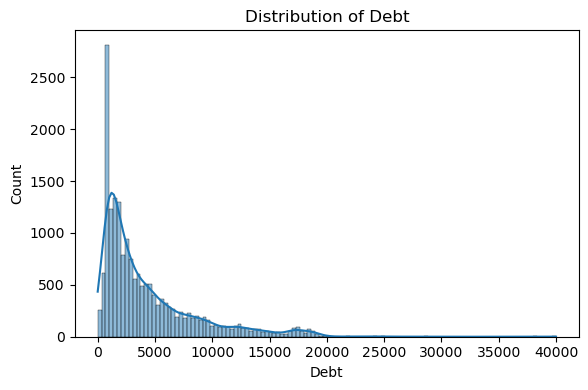

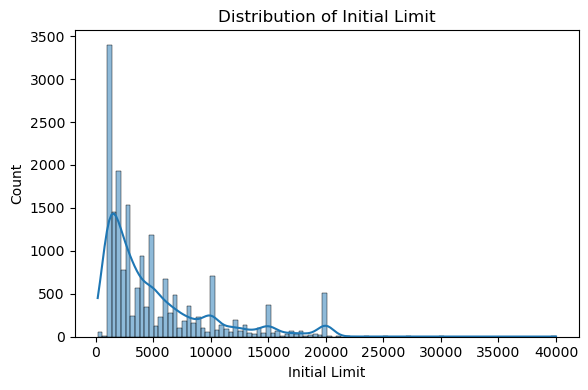

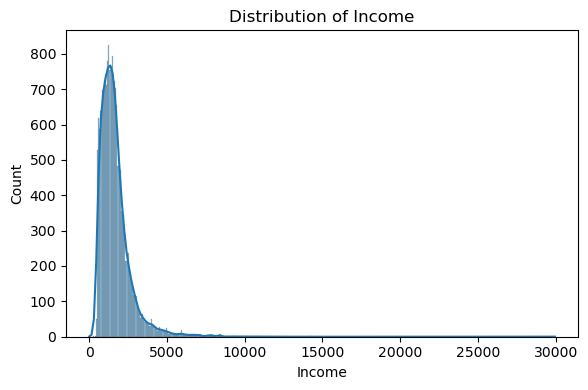

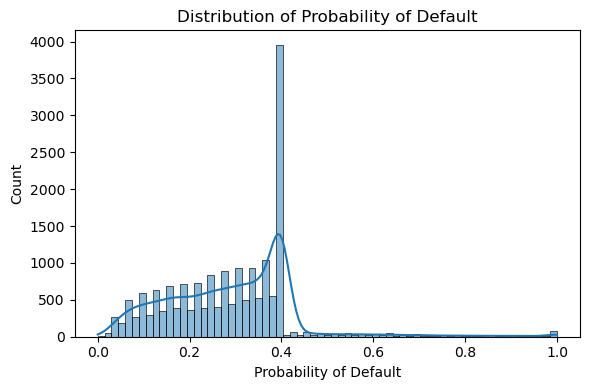

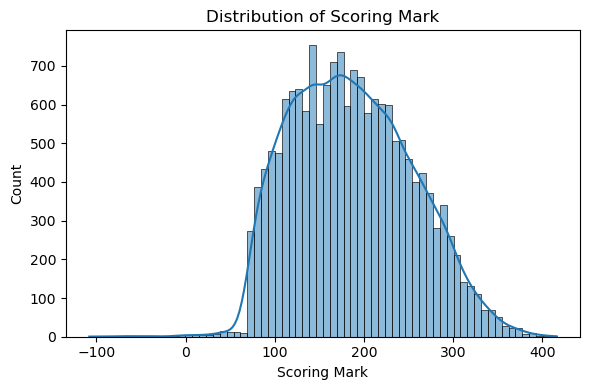

In [14]:
numerical_cols = ['Debt', 'Initial Limit', 'Income', 'Probability of Default', 'Scoring Mark']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(bank_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

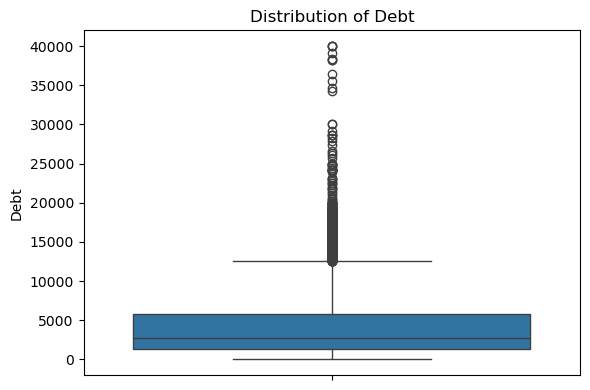

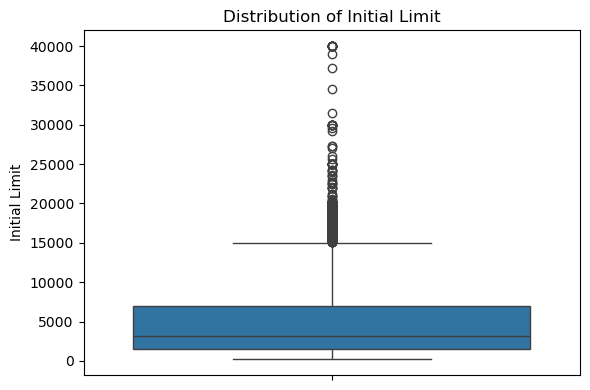

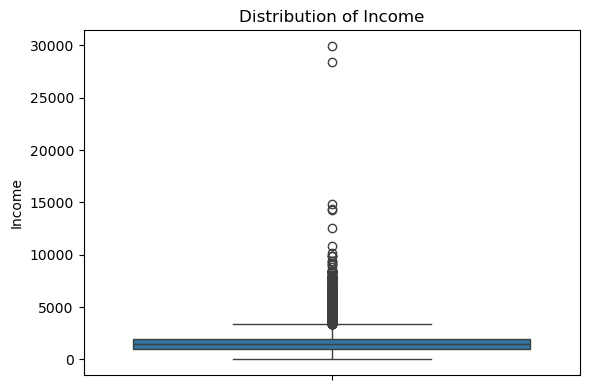

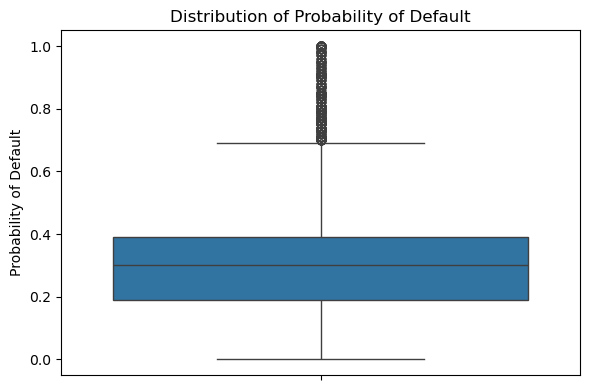

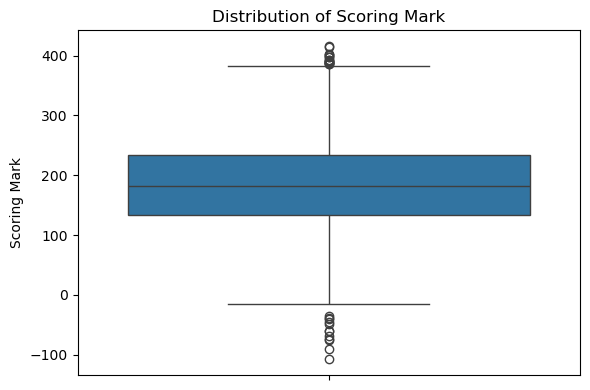

In [15]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=bank_data[col])
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

### numerical data analysis 

1. All data numerical columns contain outliers
2. 'Debt', 'Initial Limit', and 'Income' are right-skewed data, i.e., outliers lie on the higher end
3. The data contains the probability of default less than 50%, which is biased data
4. 'Scoring Mark' has almost a normal distribution graph

<center><H1>Bivariate Analysis</H1></center>

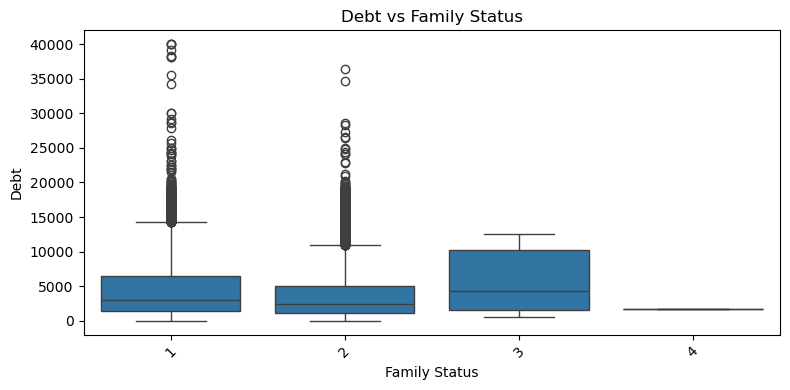

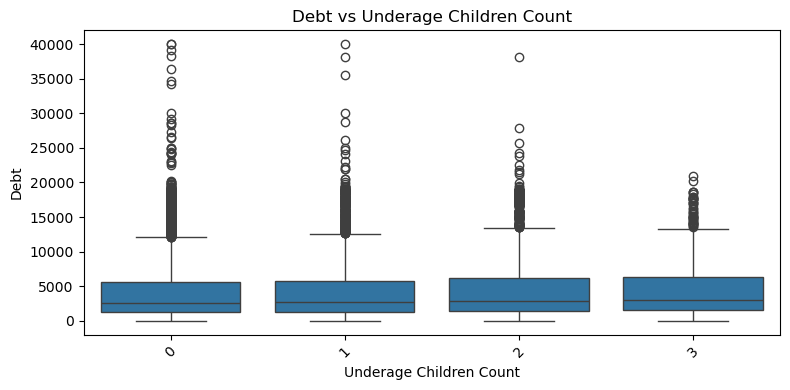

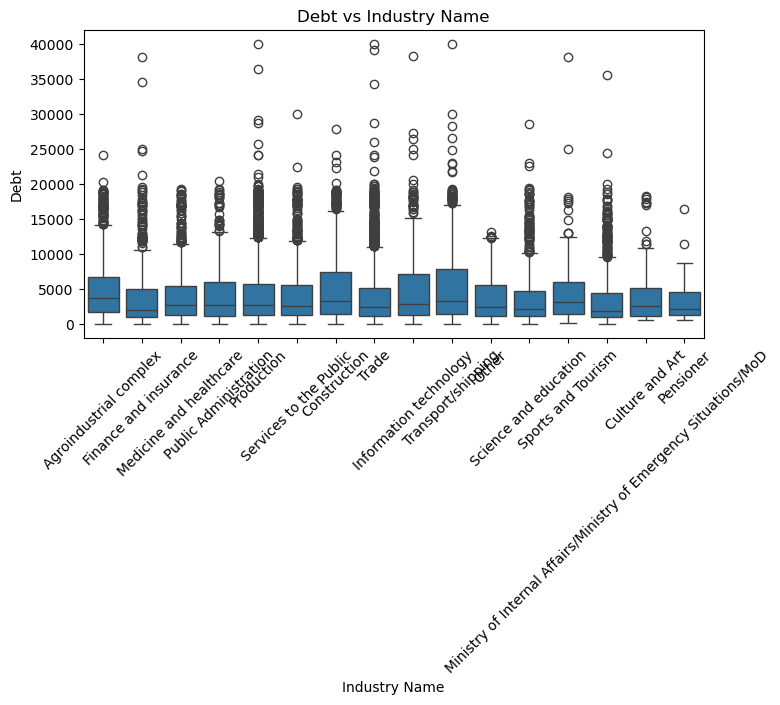

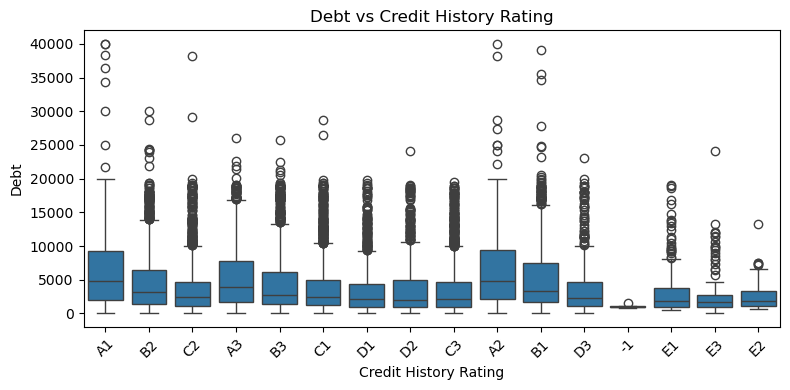

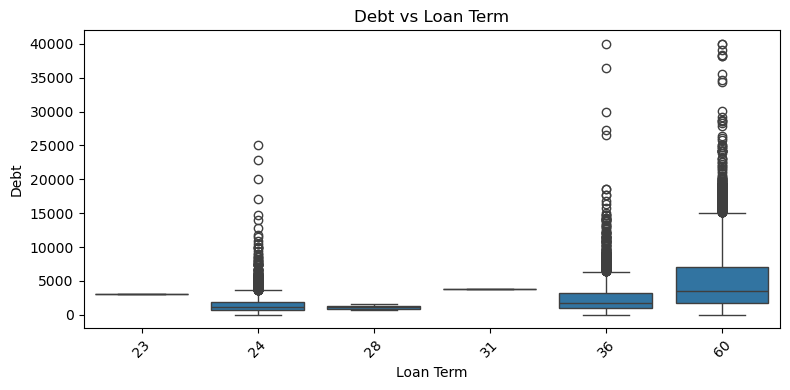

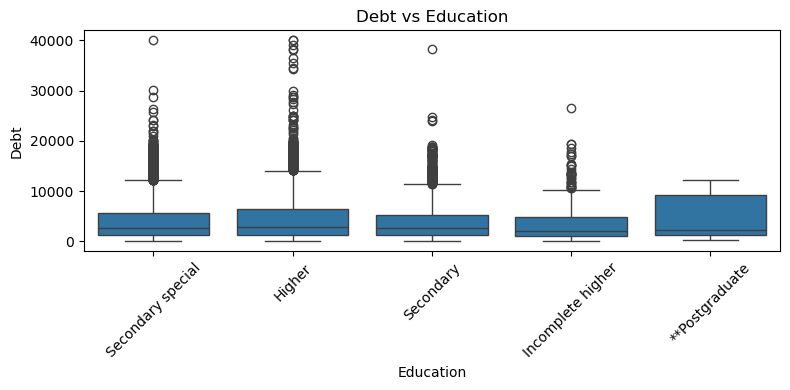

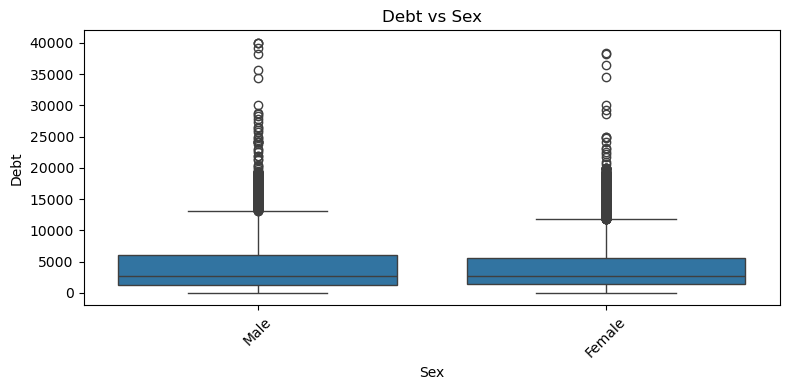

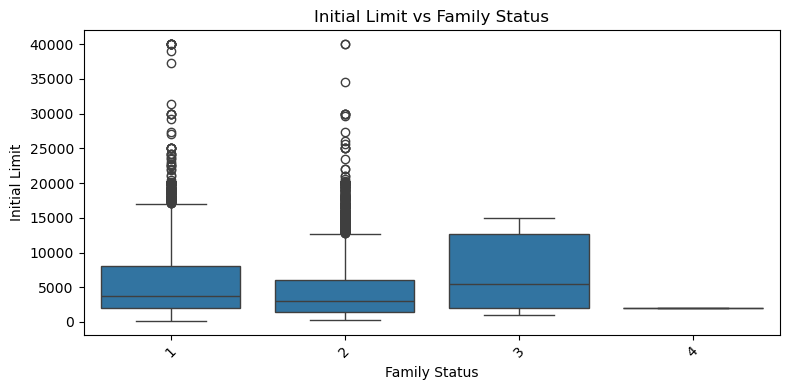

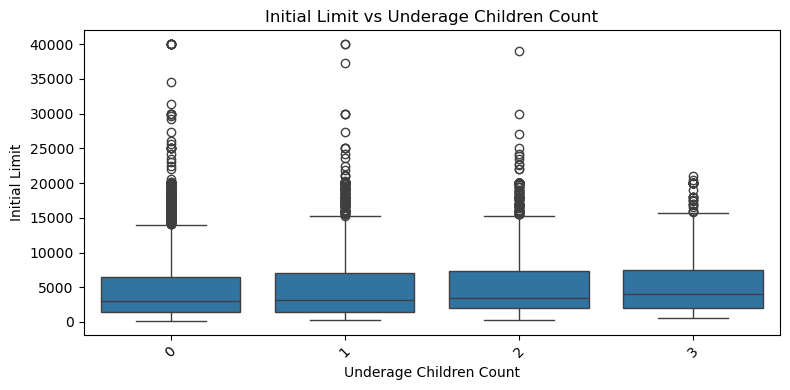

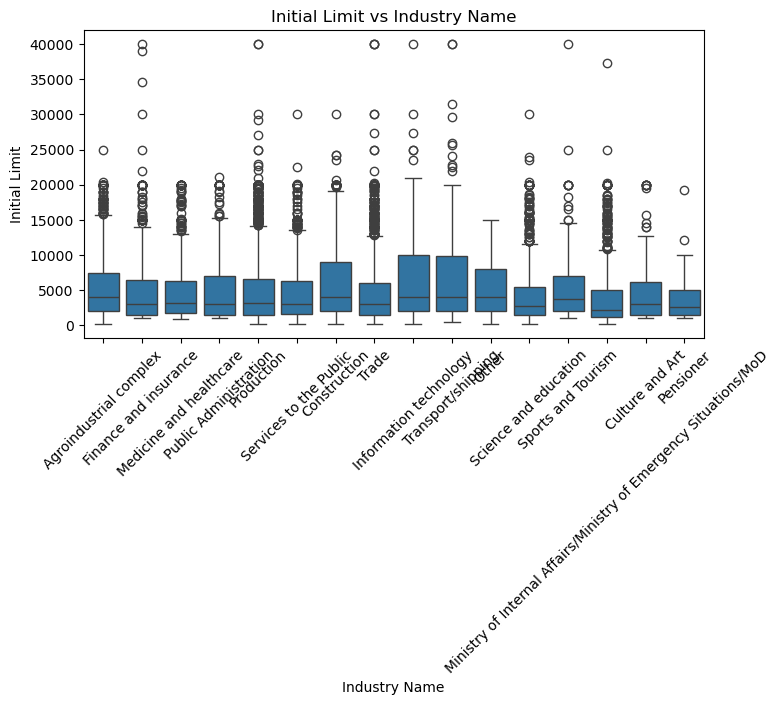

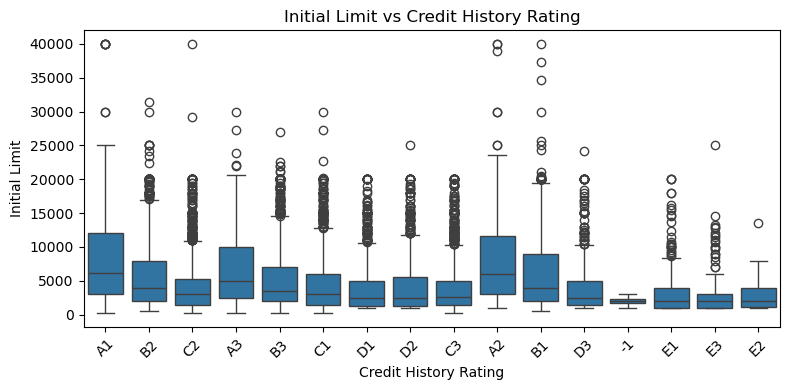

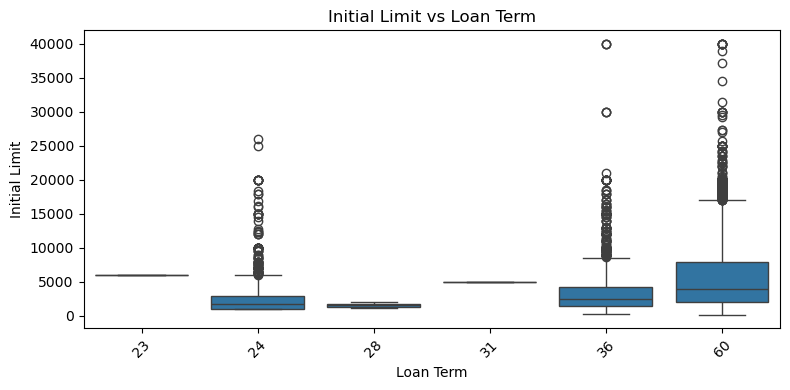

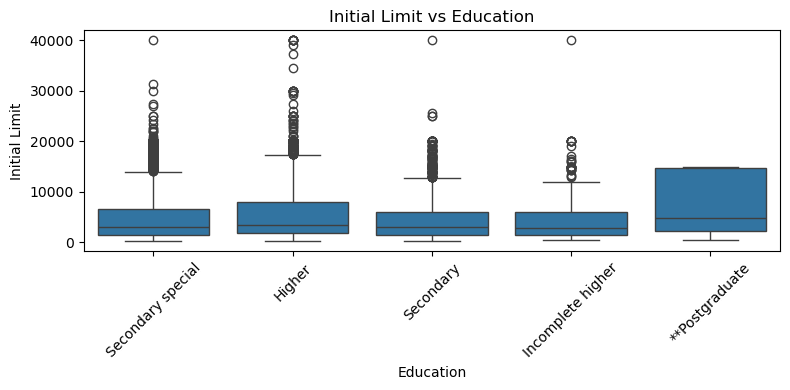

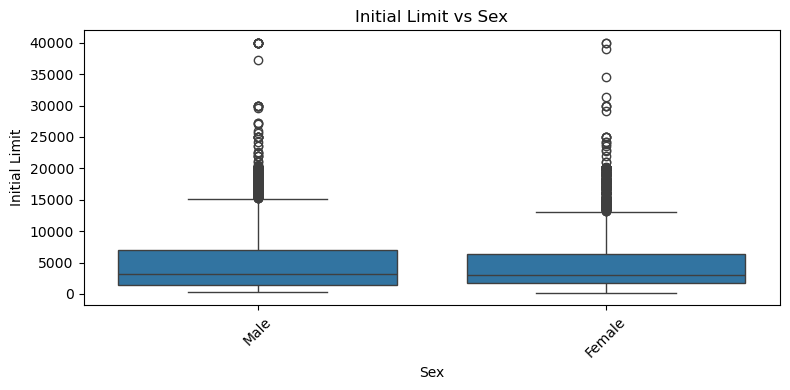

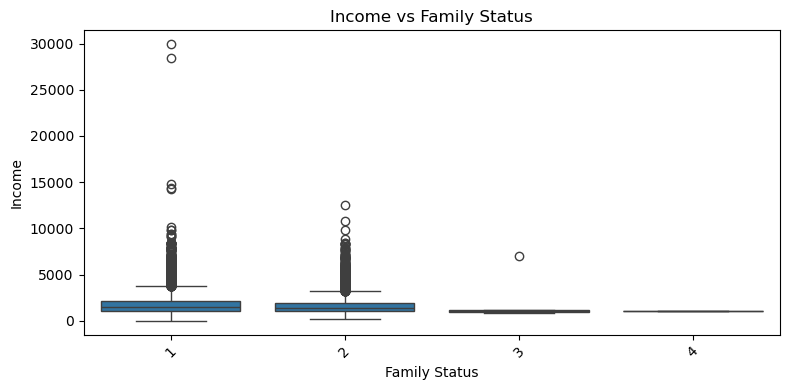

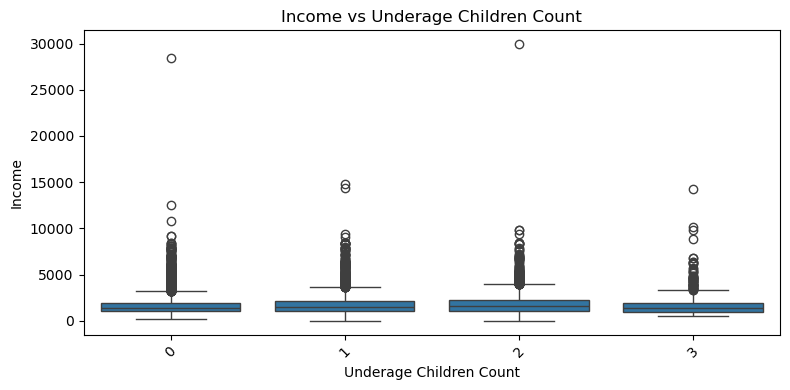

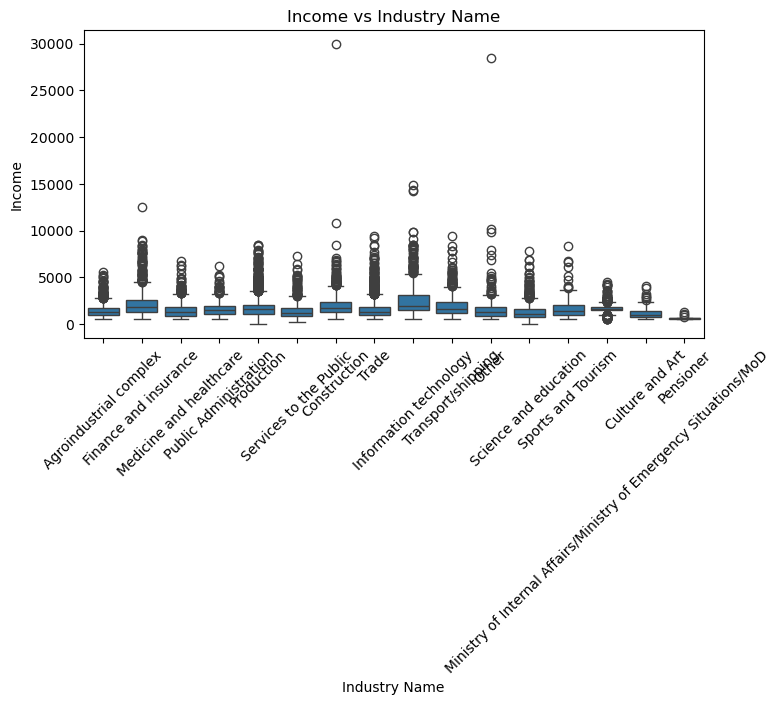

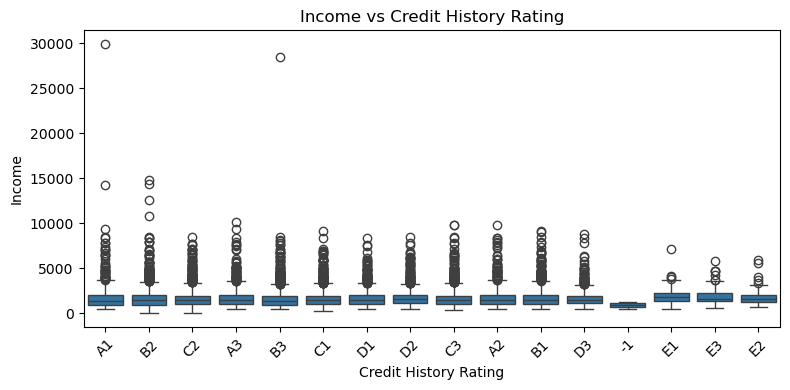

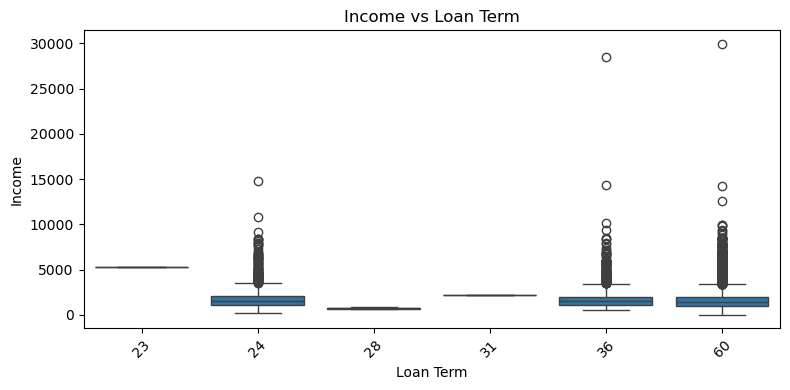

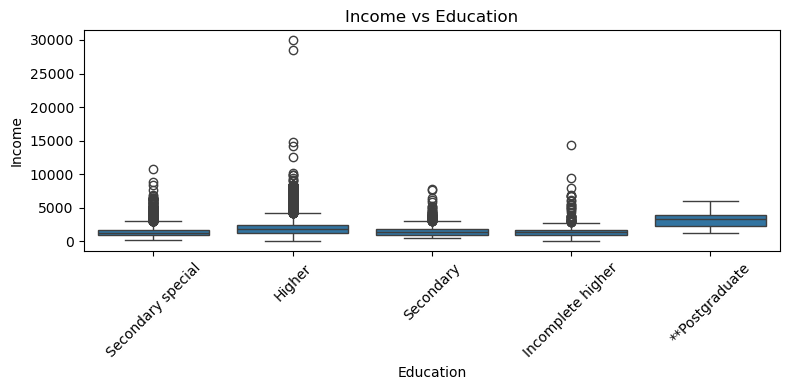

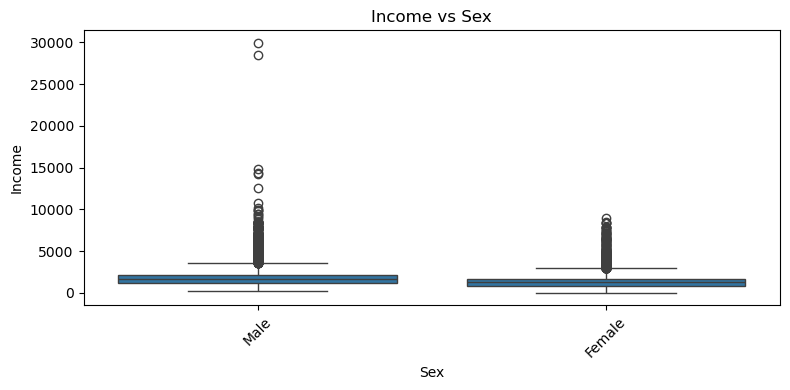

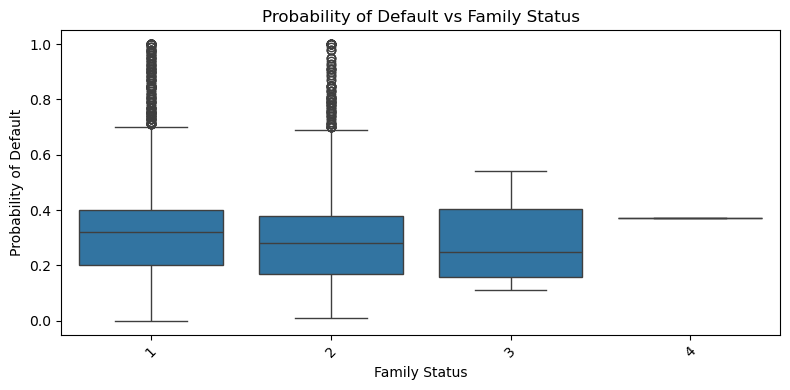

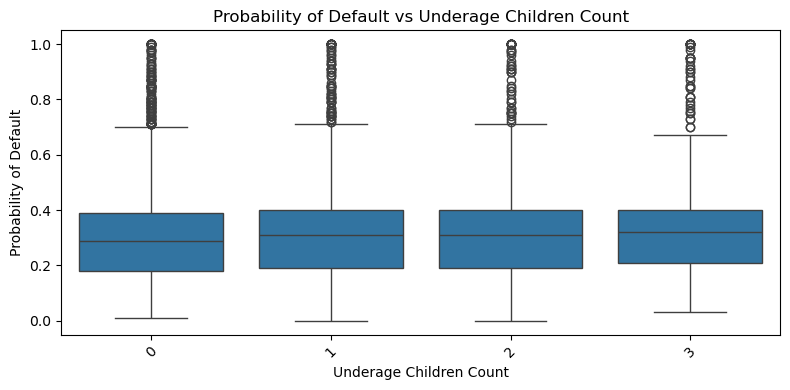

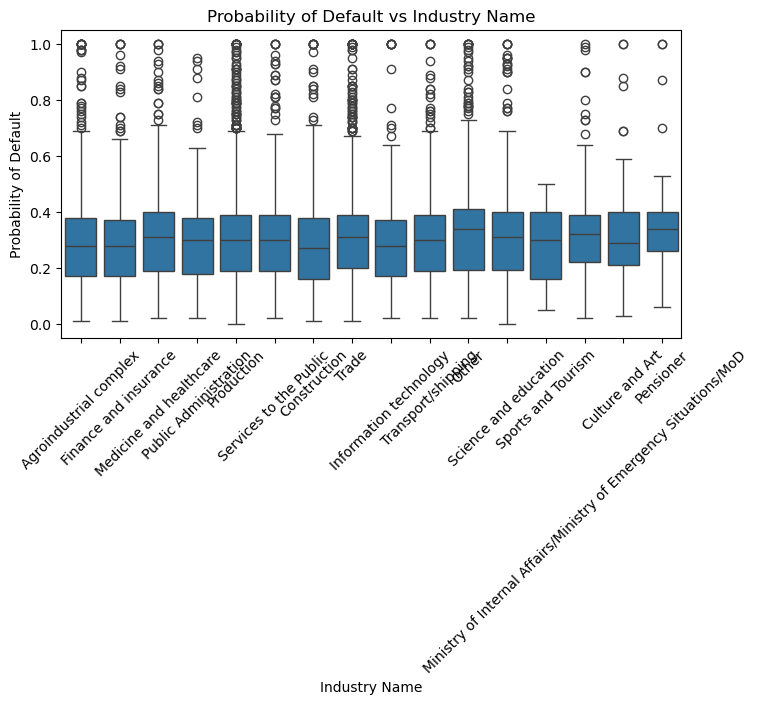

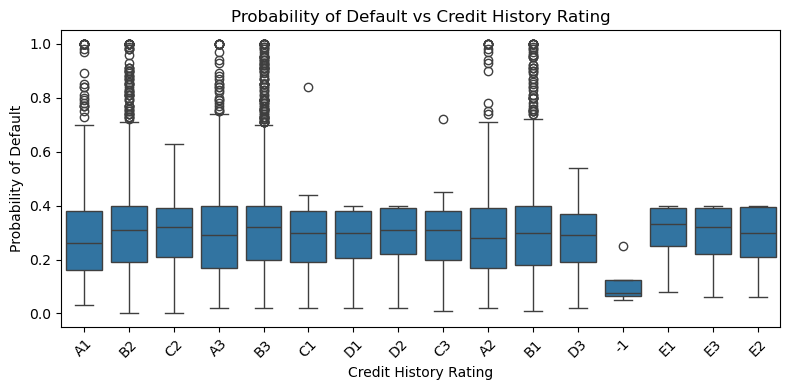

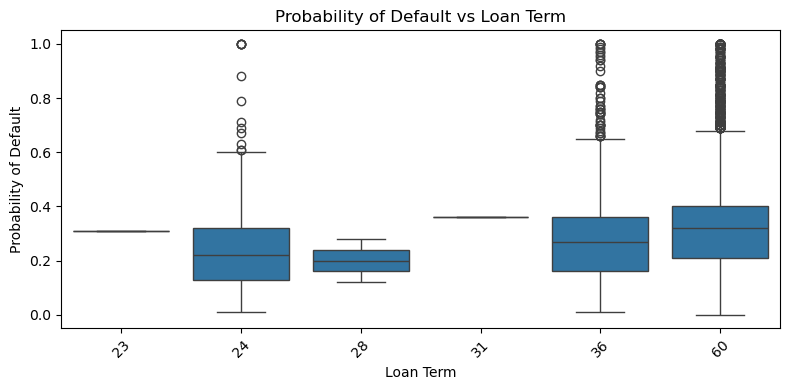

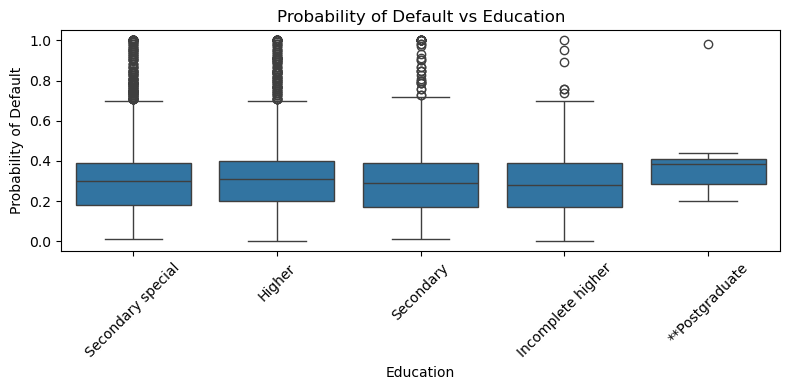

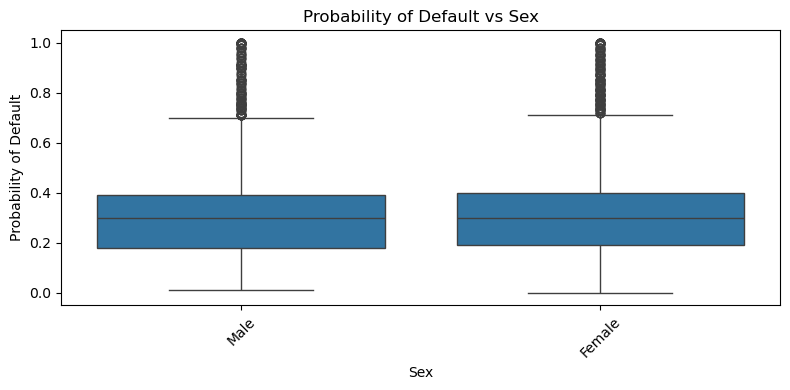

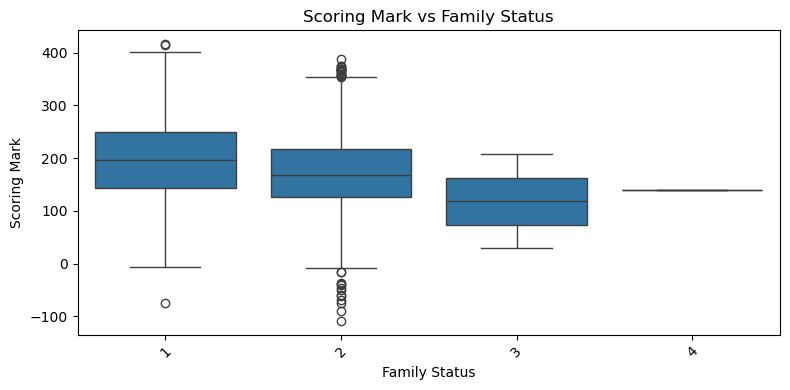

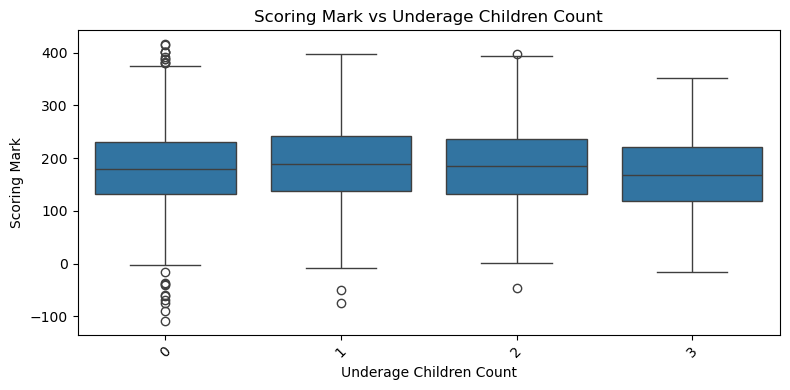

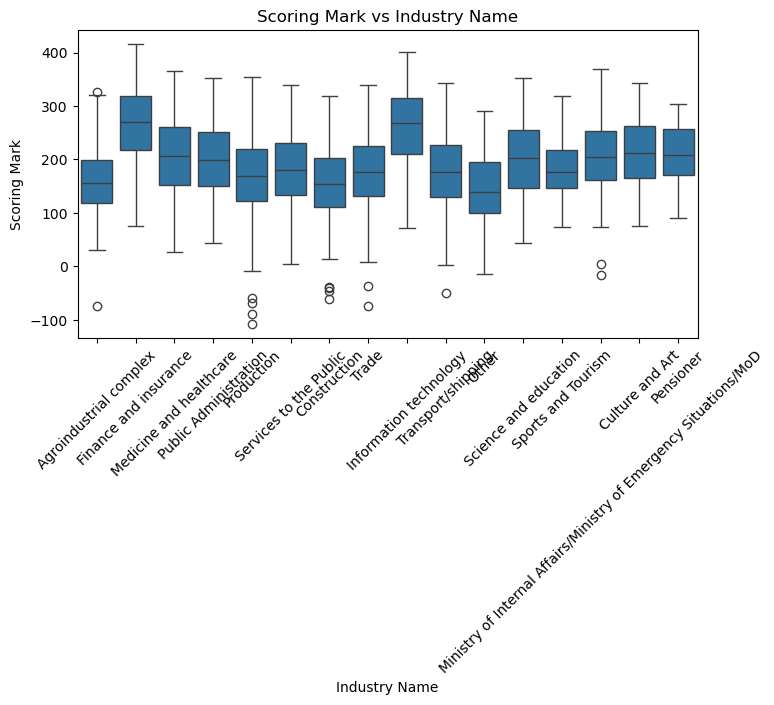

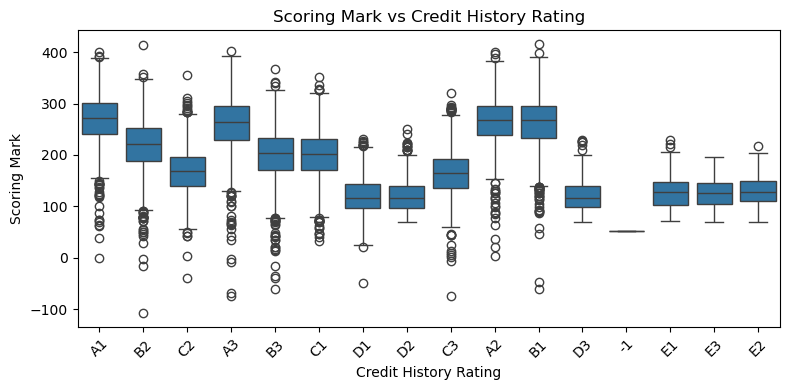

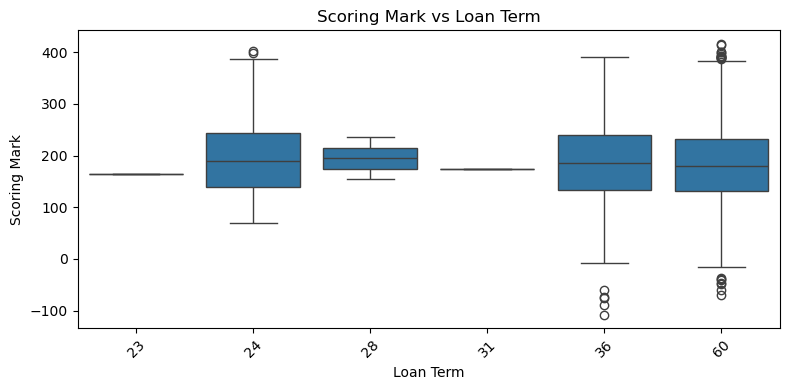

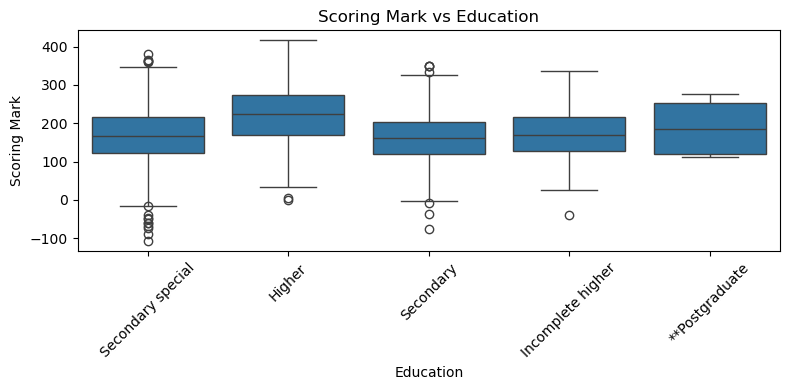

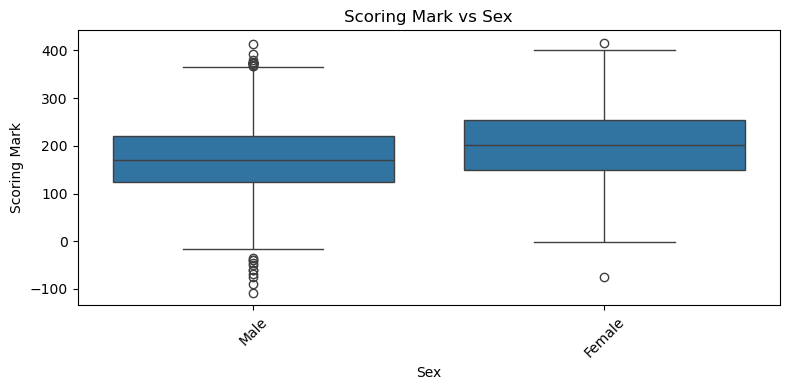

In [16]:
for num_col in numerical_cols:
    for cat_col in categorical_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=cat_col, y=num_col, data=bank_data)
        plt.xticks(rotation=45)
        plt.title(f'{num_col} vs {cat_col}')
        plt.tight_layout()
        plt.show()

### conclusion
1. Customers with a single-family status have withdrawn more debt than married or divorced people.
2. Customers with 0-1 underage children have taken more debt than 2-3.
3. The loan amount for people working in production or trade has been withdrawn at the highest loan amount.
4. On average, if the credit rating history is above 'A', provided loan amount is greater.
5. The higher the loan term, the higher the loan amount.
6. Males are more likely to take a higher amount of loan than women.
7. Income for single people is higher than others.
8. The Avg Income of Males is Higher than that of Women.

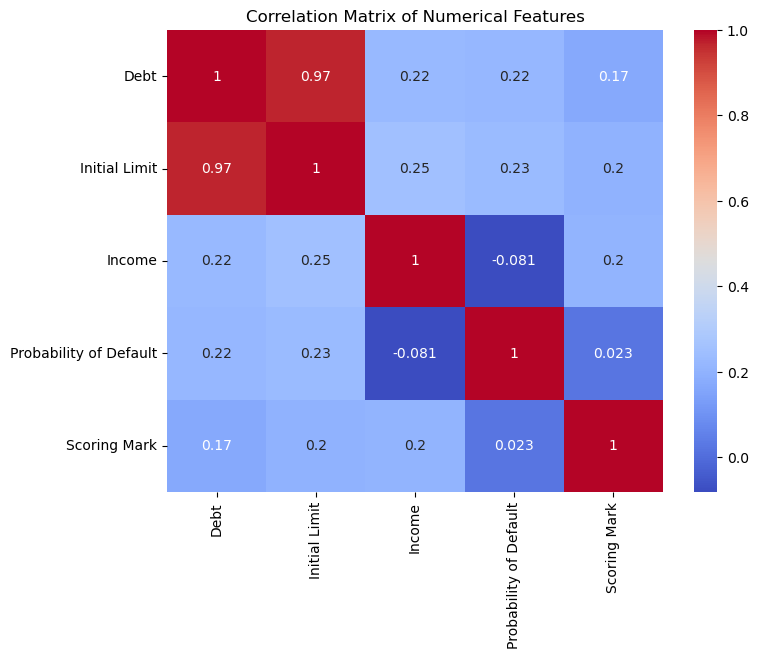

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(bank_data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

1. The Initial Limit for the loan is highly correlated to the debt of the customer; the higher the Initial Limit, the higher the debt
2. Probability of default is inversely correlated to Income,i.e., if the customer has higher income he/she is less likely to default on loan repayment.


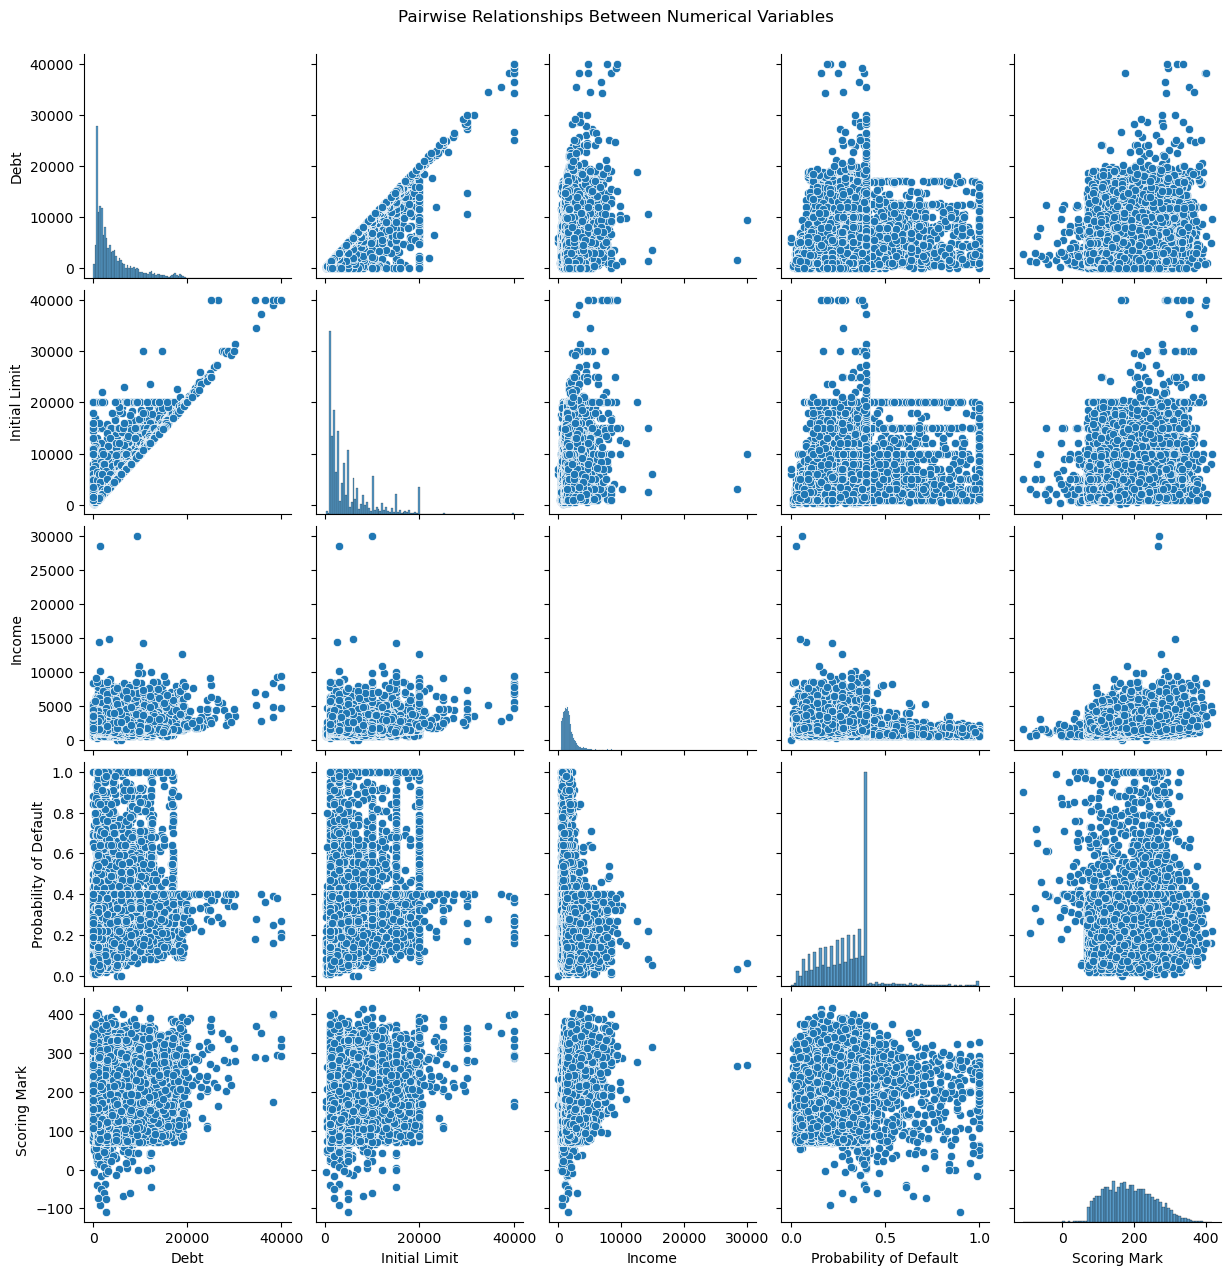

In [18]:
sns.pairplot(bank_data[numerical_cols])
plt.suptitle("Pairwise Relationships Between Numerical Variables", y=1.02)
plt.show()

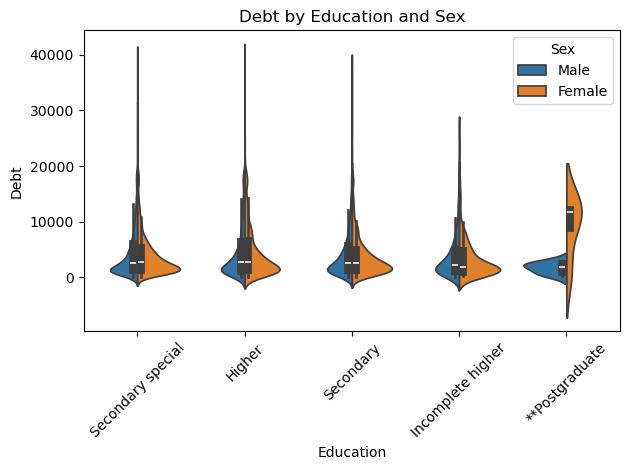

In [19]:
sns.violinplot(x="Education", y="Debt", hue="Sex", data=bank_data, split=True)
plt.title("Debt by Education and Sex")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

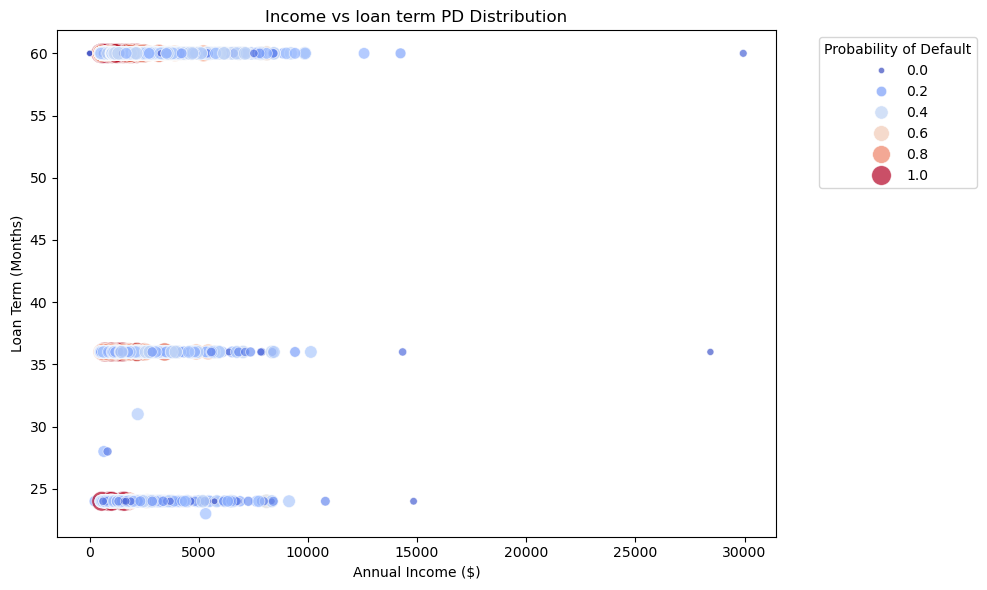

In [22]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=bank_data, x='Income', y='Loan Term', hue='Probability of Default',palette='coolwarm',size='Probability of Default',sizes=(20, 200),alpha=0.7)
plt.title('Income vs loan term PD Distribution')
plt.xlabel('Annual Income ($)')
plt.ylabel('Loan Term (Months)')
plt.legend(title='Probability of Default', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

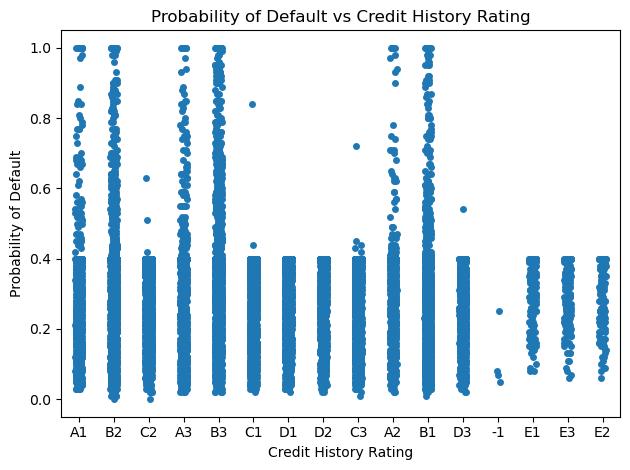

In [23]:
sns.stripplot(x="Credit History Rating", y="Probability of Default", data=bank_data, jitter=True)
plt.title("Probability of Default vs Credit History Rating")
plt.tight_layout()
plt.show()

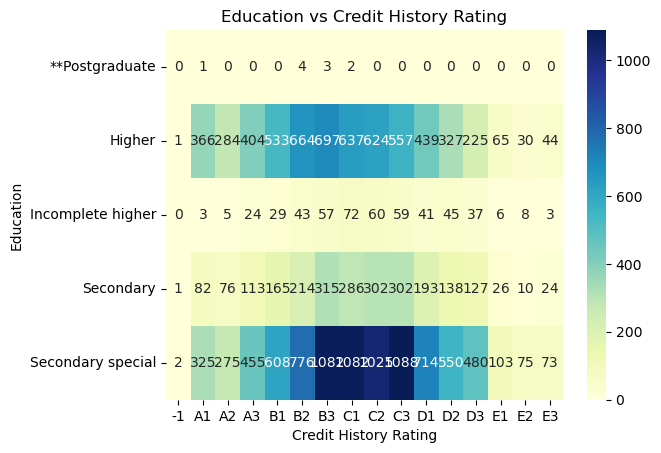

In [24]:
cross_tab = pd.crosstab(bank_data['Education'], bank_data['Credit History Rating'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Education vs Credit History Rating")
plt.show()

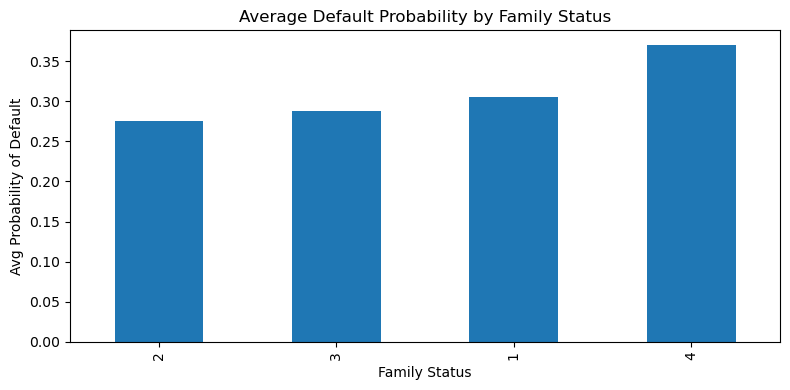

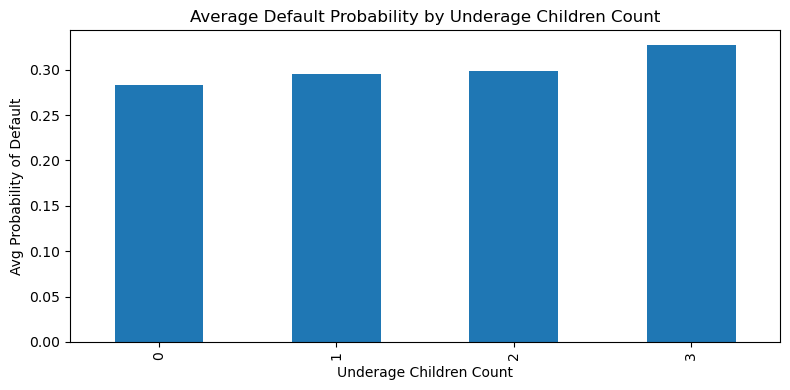

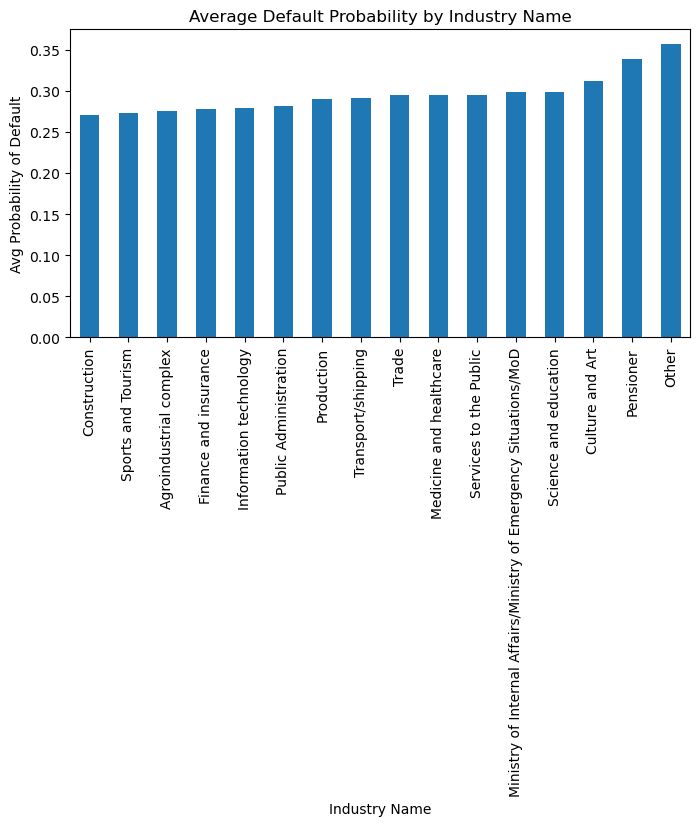

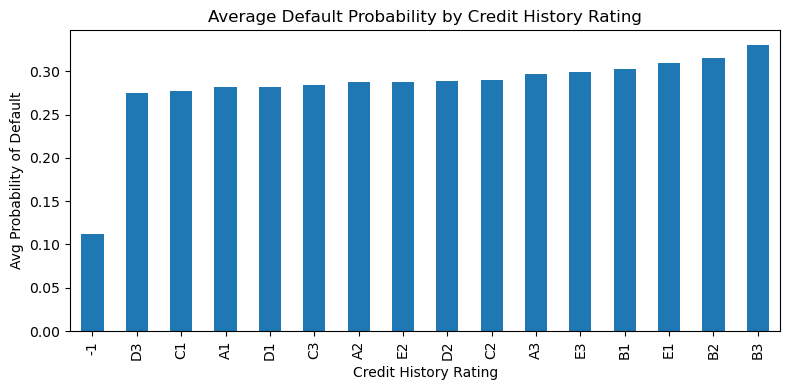

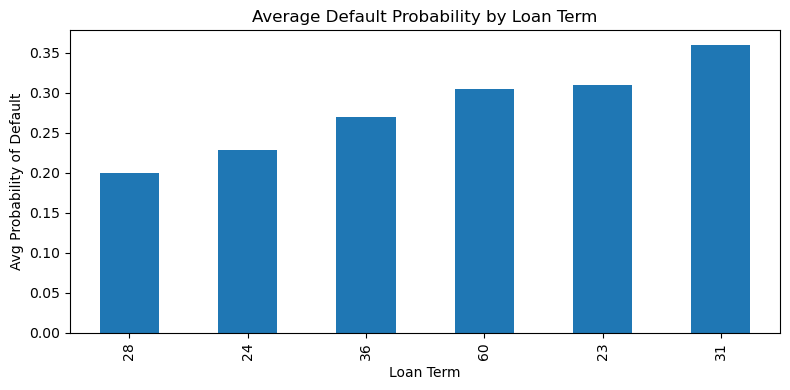

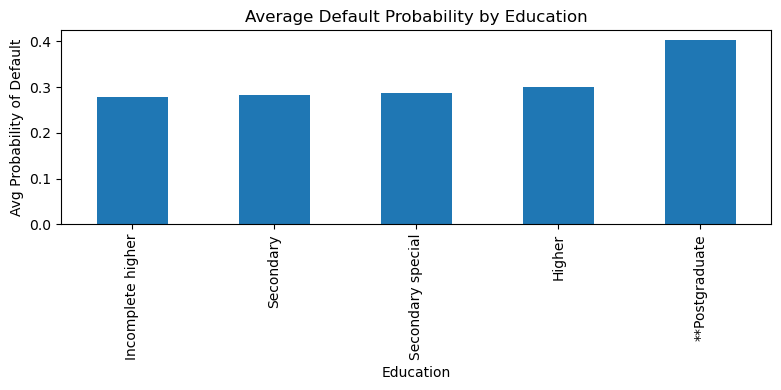

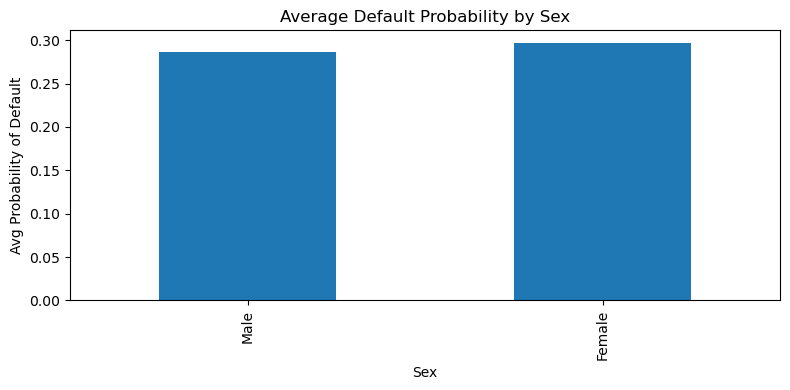

In [25]:
for cat_col in categorical_cols:
    plt.figure(figsize=(8, 4))
    bank_data.groupby(cat_col)['Probability of Default'].mean().sort_values().plot(kind='bar')
    plt.ylabel("Avg Probability of Default")
    plt.title(f"Average Default Probability by {cat_col}")
    plt.tight_layout()
    plt.show()